In [1]:
conda install -c conda-forge numpy pandas matplotlib seaborn scikit-learn

Channels:
Note: you may need to restart the kernel to use updated packages.

 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Avantika\anaconda3\envs\p4

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            2_gnu          48 KB  conda-forge
    brotli-1.1.0               |       h2466b09_2          19 KB  conda-forge
    brotli-bin-1.1.0           |       h2466b09_2          20 KB  conda-forge
    cairo-1.18.2               |       h5782bbf_1         1.4 MB  conda-forge
    contourpy-1.3.1            |  py310hc19bc0b_0         195 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_1          13 KB  conda-forge
    double-conversion-3.3.0    |       h631

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [73]:
df=pd.read_csv(r"../dataset/yield_df.csv")

In [74]:
df.head()

,Unnamed: 0,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [75]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
yield                            0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Area']=label_encoder.fit_transform(df['Area'])
df['Item']=label_encoder.fit_transform(df['Item'])


In [78]:
df=df.drop('Unnamed: 0',axis=1)
df.head(10)

,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485,121.0,16.37
1,0,3,1990,66667,1485,121.0,16.37
2,0,4,1990,23333,1485,121.0,16.37
3,0,5,1990,12500,1485,121.0,16.37
4,0,6,1990,7000,1485,121.0,16.37
5,0,8,1990,30197,1485,121.0,16.37
6,0,1,1991,29068,1485,121.0,15.36
7,0,3,1991,77818,1485,121.0,15.36
8,0,4,1991,28538,1485,121.0,15.36
9,0,5,1991,6667,1485,121.0,15.36


<function matplotlib.pyplot.show(close=None, block=None)>

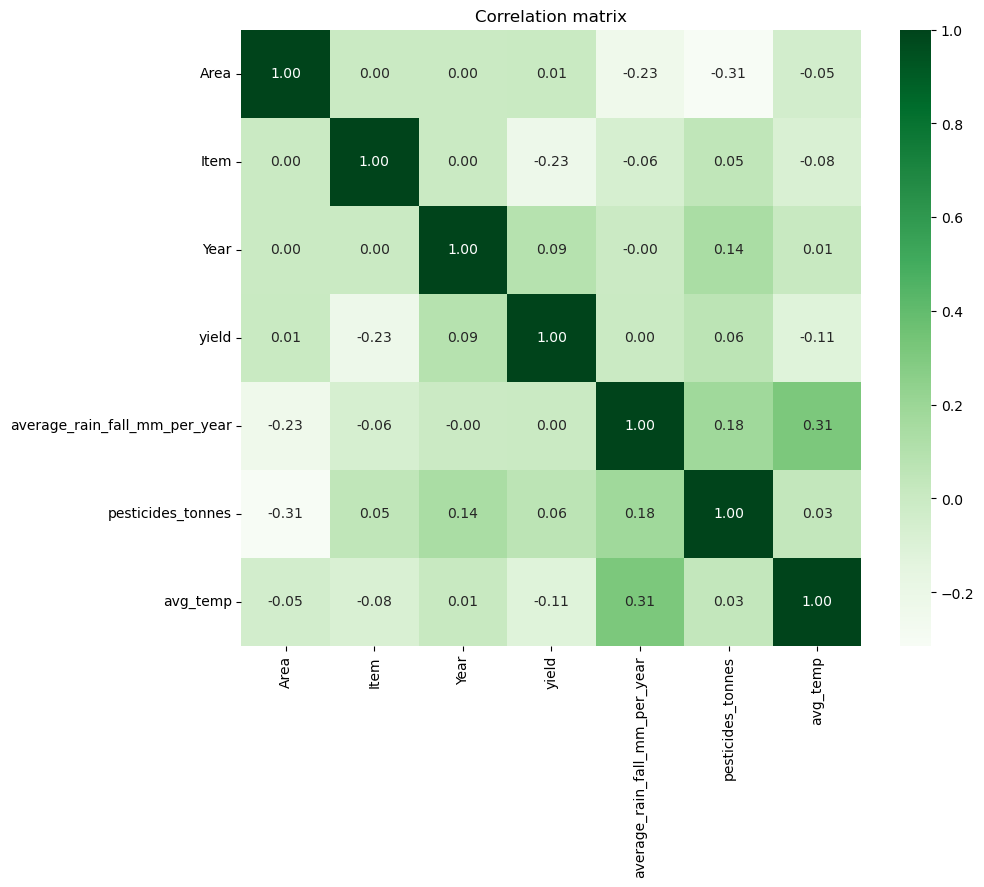

In [79]:
data_corr=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(data_corr,annot=True,cmap='Greens',fmt='.2f')
plt.title('Correlation matrix')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

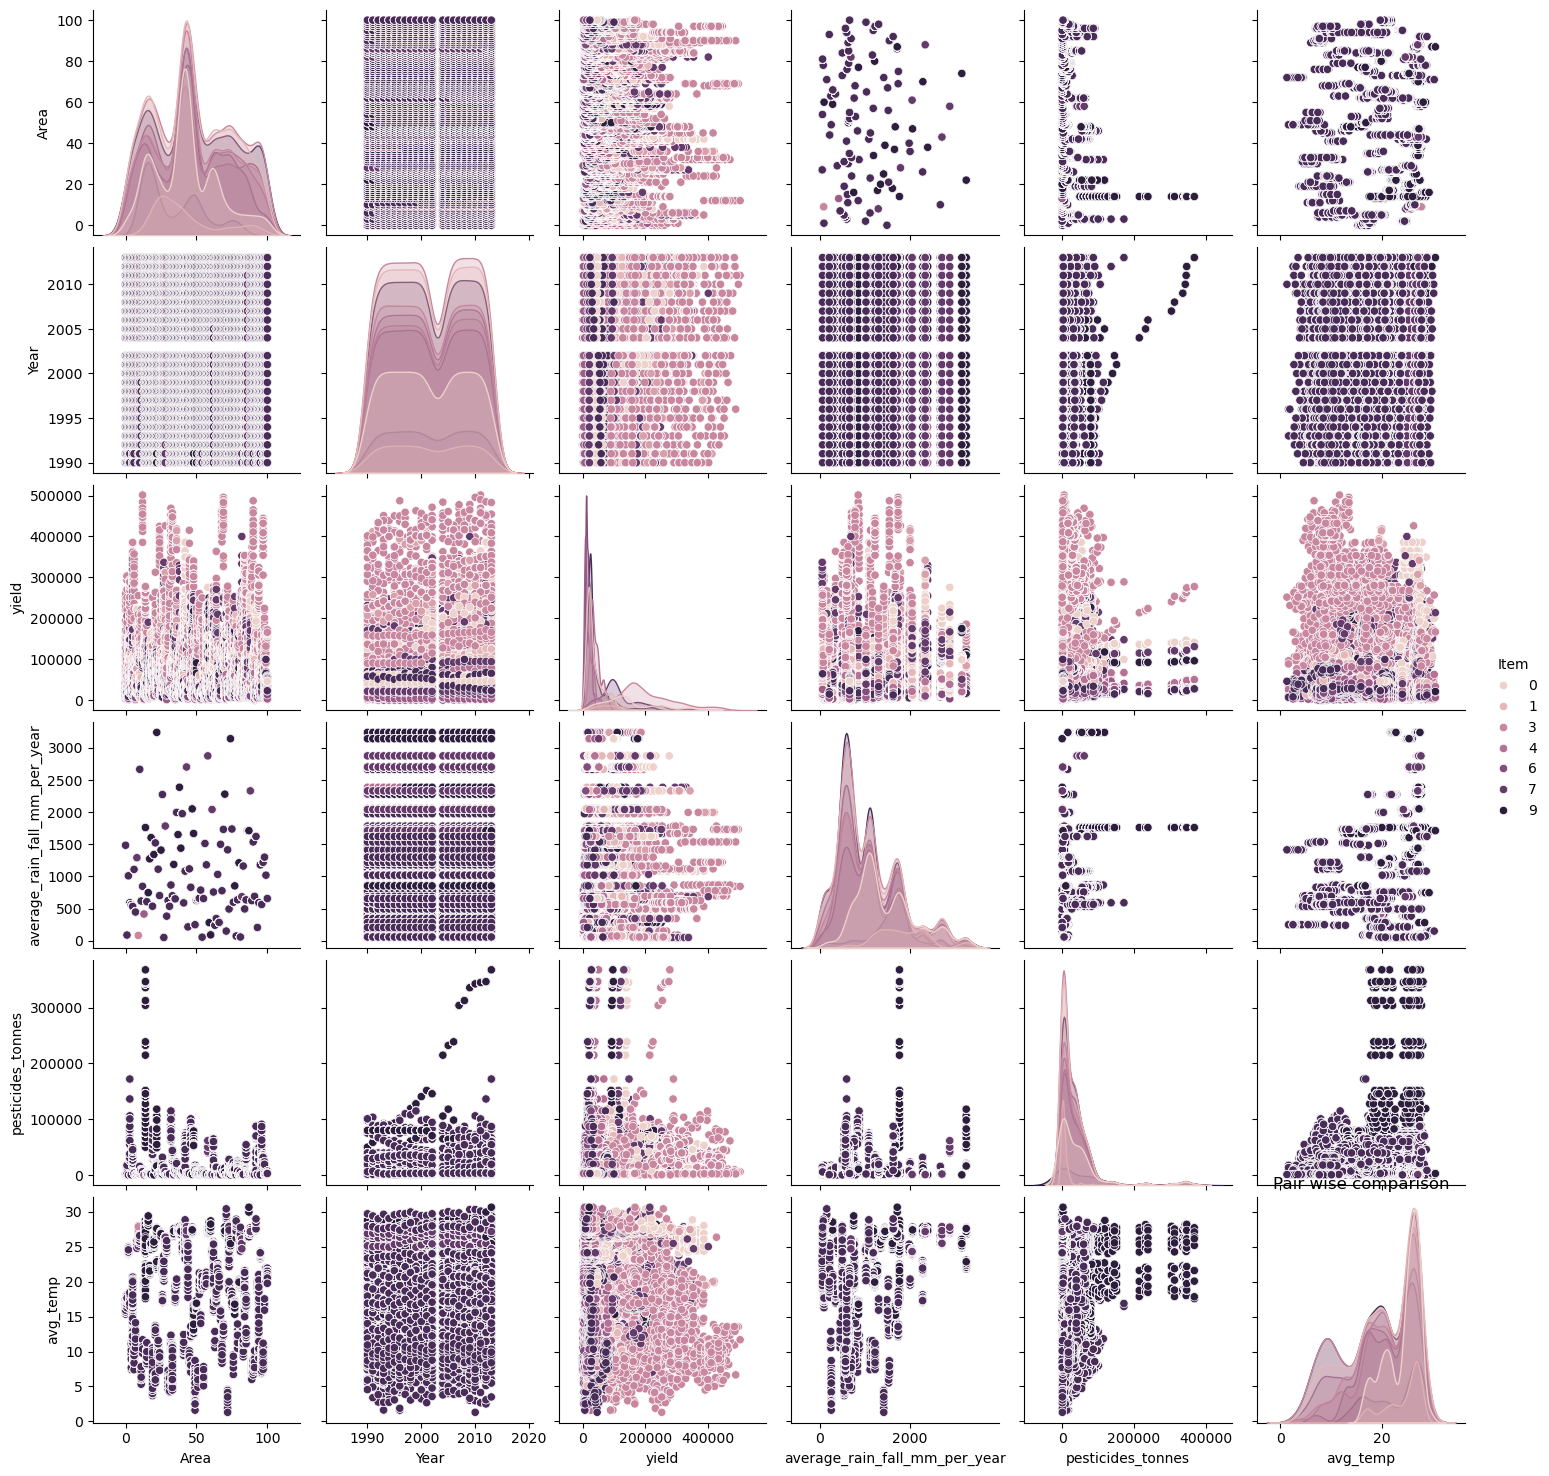

In [69]:
plt.figure(figsize=(8,8))
sns.pairplot(df,hue='Item')
plt.title('Pair wise comparison')
plt.show         

In [44]:
conda install -c conda-forge lightgbm


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Avantika\anaconda3\envs\p4

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    khronos-opencl-icd-loader-2024.10.24|       h2466b09_1          46 KB  conda-forge
    libboost-1.84.0            |       hb0986bb_7         2.3 MB  conda-forge
    liblightgbm-4.5.0          |   cpu_hb4e115d_3         1.2 MB  conda-forge
    lightgbm-4.5.0             |         cpu_py_3          81 KB  conda-forge
    opencl-headers-2024.10.24  |       he0c23c2_0          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.6 MB

The

In [45]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

In [80]:
x=df.drop('yield' , axis=1)
y=df['yield']

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


#### Train Model

In [85]:
params = {
    'objective': 'regression', 
    'metric': 'rmse', 
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
}

train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

model = lgb.train(
    params,
    train_data,
    num_boost_round=200,
    valid_sets=[train_data, test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10),lgb.log_evaluation(period=10)],
    
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 19769, number of used features: 6
[LightGBM] [Info] Start training from score 76864.978198
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 62565.1	valid_1's rmse: 64156.6
[20]	training's rmse: 45603.2	valid_1's rmse: 47088.6
[30]	training's rmse: 35697.8	valid_1's rmse: 37220.1
[40]	training's rmse: 29848.7	valid_1's rmse: 31362.3
[50]	training's rmse: 26273.5	valid_1's rmse: 27783.6
[60]	training's rmse: 24111.5	valid_1's rmse: 25602.4
[70]	training's rmse: 22592.7	valid_1's rmse: 24087.3
[80]	training's rmse: 21388.5	valid_1's rmse: 22928.3
[90]	training's rmse: 20400.2	valid_1's rmse: 21966.4
[100]	training's rmse: 19601.2	valid_1's rmse: 21184.6
[110]	training's rmse: 19055.3	valid_1's rmse: 20673.1

### Test Model

In [92]:
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 17802.99


In [93]:
import pickle

with open('model_pkl','wb') as files:
    pickle.dump(model,files)
    